# Import Libraries

In [402]:
from keras import models, layers
from keras.models import load_model
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import numpy as np 
import pandas as pd 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Model, Sequential
from keras.optimizers import Adam
import cv2

# Load the  csv data  

In [2]:
# read the csv data of the images information
metadata=pd.read_csv('/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv').drop(columns='Unnamed: 0')

summary = pd.read_csv('/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')

metadata.head(10)


,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
5,IM-0117-0001.jpeg,Normal,TRAIN,NaN,NaN
6,IM-0115-0001.jpeg,Normal,TRAIN,NaN,NaN
7,IM-0189-0001.jpeg,Normal,TRAIN,NaN,NaN
8,IM-0187-0001.jpeg,Normal,TRAIN,NaN,NaN
9,IM-0185-0001.jpeg,Normal,TRAIN,NaN,NaN


# Data cleansing & Pre-processing 

In [62]:
meta_filled=metadata.fillna('unknown')
meta_filled.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,unknown,unknown
1,IM-0127-0001.jpeg,Normal,TRAIN,unknown,unknown
2,IM-0125-0001.jpeg,Normal,TRAIN,unknown,unknown
3,IM-0122-0001.jpeg,Normal,TRAIN,unknown,unknown
4,IM-0119-0001.jpeg,Normal,TRAIN,unknown,unknown


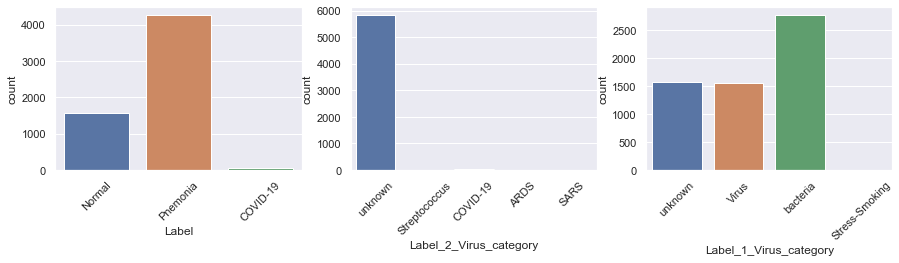

In [135]:
targets = ['Label', 'Label_2_Virus_category','Label_1_Virus_category']
plt.figure(figsize=(15,3))
for i in range(len(targets)):
    plt.subplot(1,3,i+1)
    sns.countplot(meta_filled[targets[i]])
    plt.xticks(rotation=45)

In [64]:
# we can see most data in 'Label_2_Virus_category' are unknow 
meta_filled[targets].head()
# if we see first five rows  the frist row shows Label_2_Virus_category and Label_1_Virus_category are unknow 
#but the Label column shows normal 
# let us replace unknown with normal if the Label is Normal in a same row 

,Label,Label_2_Virus_category,Label_1_Virus_category
0,Normal,unknown,unknown
1,Normal,unknown,unknown
2,Normal,unknown,unknown
3,Normal,unknown,unknown
4,Normal,unknown,unknown


In [109]:
# this is interesting all 58 the COVID-19 DATA in train dataset   
test_covid_name=list(meta_filled[meta_filled.Label_2_Virus_category=='COVID-19'].X_ray_image_name[-11:])


Dataset_type=[]
for i in range(len(meta_filled)):
    if meta_filled['X_ray_image_name'].iloc[i] in test_covid_name:
        meta_filled['Dataset_type'].iloc[i]='TEST'
    else:
        meta_filled['Dataset_type'].iloc[i]

In [118]:
# Then Change the Label if Label_2_Virus_category== COVID-19 , Label= COVID-19
for i in range(len(meta_filled)):
    if meta_filled['Label_2_Virus_category'][i]=='COVID-19':
        meta_filled['Label'][i]='COVID-19' 

In [120]:
#take a look if we already give some covid_19 data for test data  
meta_filled[meta_filled.Label_2_Virus_category=='COVID-19'].iloc[-15:]

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5271,1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg,COVID-19,TRAIN,COVID-19,Virus
5272,171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg,COVID-19,TRAIN,COVID-19,Virus
5273,1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg,COVID-19,TRAIN,COVID-19,Virus
5274,1-s2.0-S1684118220300682-main.pdf-003-b2.png,COVID-19,TRAIN,COVID-19,Virus
5275,1-s2.0-S1684118220300682-main.pdf-003-b1.png,COVID-19,TEST,COVID-19,Virus
5276,1-s2.0-S1684118220300682-main.pdf-002-a2.png,COVID-19,TEST,COVID-19,Virus
5277,1-s2.0-S1684118220300682-main.pdf-002-a1.png,COVID-19,TEST,COVID-19,Virus
5278,1-s2.0-S1684118220300608-main.pdf-002.jpg,COVID-19,TEST,COVID-19,Virus
5279,1-s2.0-S1684118220300608-main.pdf-001.jpg,COVID-19,TEST,COVID-19,Virus
5280,1-s2.0-S0929664620300449-gr2_lrg-d.jpg,COVID-19,TEST,COVID-19,Virus


In [115]:
# let us move those images into test image folder
import shutil 


for img in test_covid_name:
    # Source path  
    covid_test_img= '/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}'.format(img)

    # Destination path  
    test_folder = '/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

    # Move the content of  
    # source to destination  
    dest = shutil.move(covid_test_img, test_folder)  

In [121]:
# make sure our target is ternary 
meta_filled.groupby('Dataset_type')['Label'].value_counts()

Dataset_type  Label   
TEST          Pnemonia     390
              Normal       234
              COVID-19      11
TRAIN         Pnemonia    3886
              Normal      1342
              COVID-19      47
Name: Label, dtype: int64

In [771]:
# plot the bar chart  and we rarely can see last four items
def distribution_plot(data,col,color,topic):
    data[col].value_counts().plot(kind='bar',color='{}'.format(color))
    plt.title('Distribution of Target - {} '.format(topic),fontsize=20)
    plt.xticks(rotation=0)
    plt.ylabel('Counts',fontsize=15)

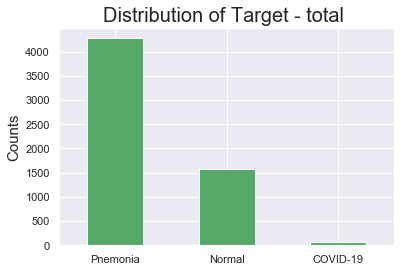

In [772]:
distribution_plot(meta_filled,"Label",'g','total')

# declare train data and test data

In [183]:
train_label= meta_filled[meta_filled['Dataset_type'] == 'TRAIN']
test_label= meta_filled[meta_filled['Dataset_type'] == 'TEST']

In [184]:
train_label.sample(10)

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
2610,person1529_virus_2663.jpeg,Pnemonia,TRAIN,unknown,Virus
3197,person312_virus_635.jpeg,Pnemonia,TRAIN,unknown,Virus
2354,person1484_virus_2576.jpeg,Pnemonia,TRAIN,unknown,Virus
3598,person336_bacteria_1552.jpeg,Pnemonia,TRAIN,unknown,bacteria
1736,person1220_bacteria_3174.jpeg,Pnemonia,TRAIN,unknown,bacteria
3603,person335_virus_690.jpeg,Pnemonia,TRAIN,unknown,Virus
741,NORMAL2-IM-0535-0001.jpeg,Normal,TRAIN,unknown,unknown
2101,person1433_virus_2447.jpeg,Pnemonia,TRAIN,unknown,Virus
4303,person563_bacteria_2339.jpeg,Pnemonia,TRAIN,unknown,bacteria
358,IM-0543-0001.jpeg,Normal,TRAIN,unknown,unknown


In [185]:
test_label.sample(10)

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5404,NORMAL2-IM-0301-0001.jpeg,Normal,TEST,unknown,unknown
5489,NORMAL2-IM-0374-0001.jpeg,Normal,TEST,unknown,unknown
5805,person51_virus_105.jpeg,Pnemonia,TEST,unknown,Virus
5320,NORMAL2-IM-0013-0001.jpeg,Normal,TEST,unknown,unknown
5829,person32_virus_71.jpeg,Pnemonia,TEST,unknown,Virus
5425,NORMAL2-IM-0273-0001.jpeg,Normal,TEST,unknown,unknown
5793,person63_virus_121.jpeg,Pnemonia,TEST,unknown,Virus
5666,person117_bacteria_556.jpeg,Pnemonia,TEST,unknown,bacteria
5568,person14_virus_44.jpeg,Pnemonia,TEST,unknown,Virus
5460,NORMAL2-IM-0146-0001.jpeg,Normal,TEST,unknown,unknown


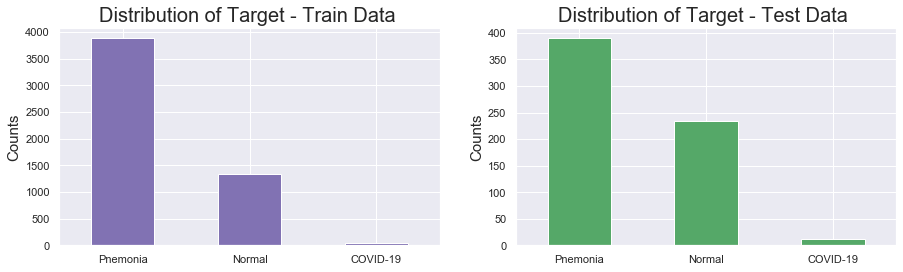

In [776]:
# train data 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
distribution_plot(train_label,'Label','m',"Train Data")
plt.subplot(1,2,2)
distribution_plot(test_label,'Label','g','Test Data')

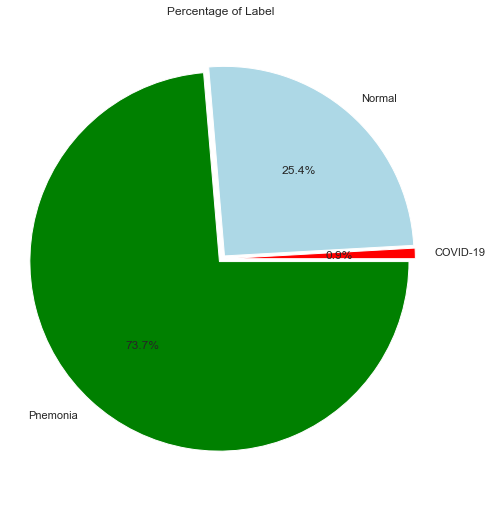

In [188]:
# plot the pie chart 
colors = [ 'red', 'lightblue', 'green']
explode = [0.02, 0.02,0.02]

values = ['COVID-19', 'Normal', 'Pnemonia']
percentages = [100 * (train_label[train_label['Label'] == 'COVID-19'].shape[0]) / train_label.shape[0],
              100 * (train_label[train_label['Label'] == 'Normal'].shape[0]) / train_label.shape[0],
               100 * (train_label[train_label['Label'] == 'Pnemonia'].shape[0]) / train_label.shape[0],
              
              ]

fig1, ax1 = plt.subplots(figsize=(7, 7))

plt.pie(percentages, colors=colors, labels=values,
        autopct='%1.1f%%', startangle=0, explode=explode)
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0,fc='white')
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.title('Percentage of Label')
plt.show()


In [189]:
# the path for test folder and train folder
TEST_FOLDER = '/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
TRAIN_FOLDER = '/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

# Image Histograms
An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

In [158]:
# Plot b/w image histograms of Label_2_Virus_category type "COVID-19" patients 
def plot_image_histograms(col_name):
    fig, ax = plt.subplots(4, 2, figsize=(20, 20))

    type_file_paths = train_label[train_label['Label'] == col_name]['X_ray_image_name'].values
    sample_file_paths = type_file_paths[:4]
    sample_file_paths = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_file_paths))

    for row, file_path in enumerate(sample_file_paths):
        image = plt.imread(file_path)
        ax[row, 0].imshow(image)
        ax[row, 1].hist(image.ravel(), 256, [0,256])
        ax[row, 0].axis('off')
        if row == 0:
            ax[row, 0].set_title('Images')
            ax[row, 1].set_title('Histograms')
    fig.suptitle('Label Category = {}'.format(col_name), size=16)
    plt.show()

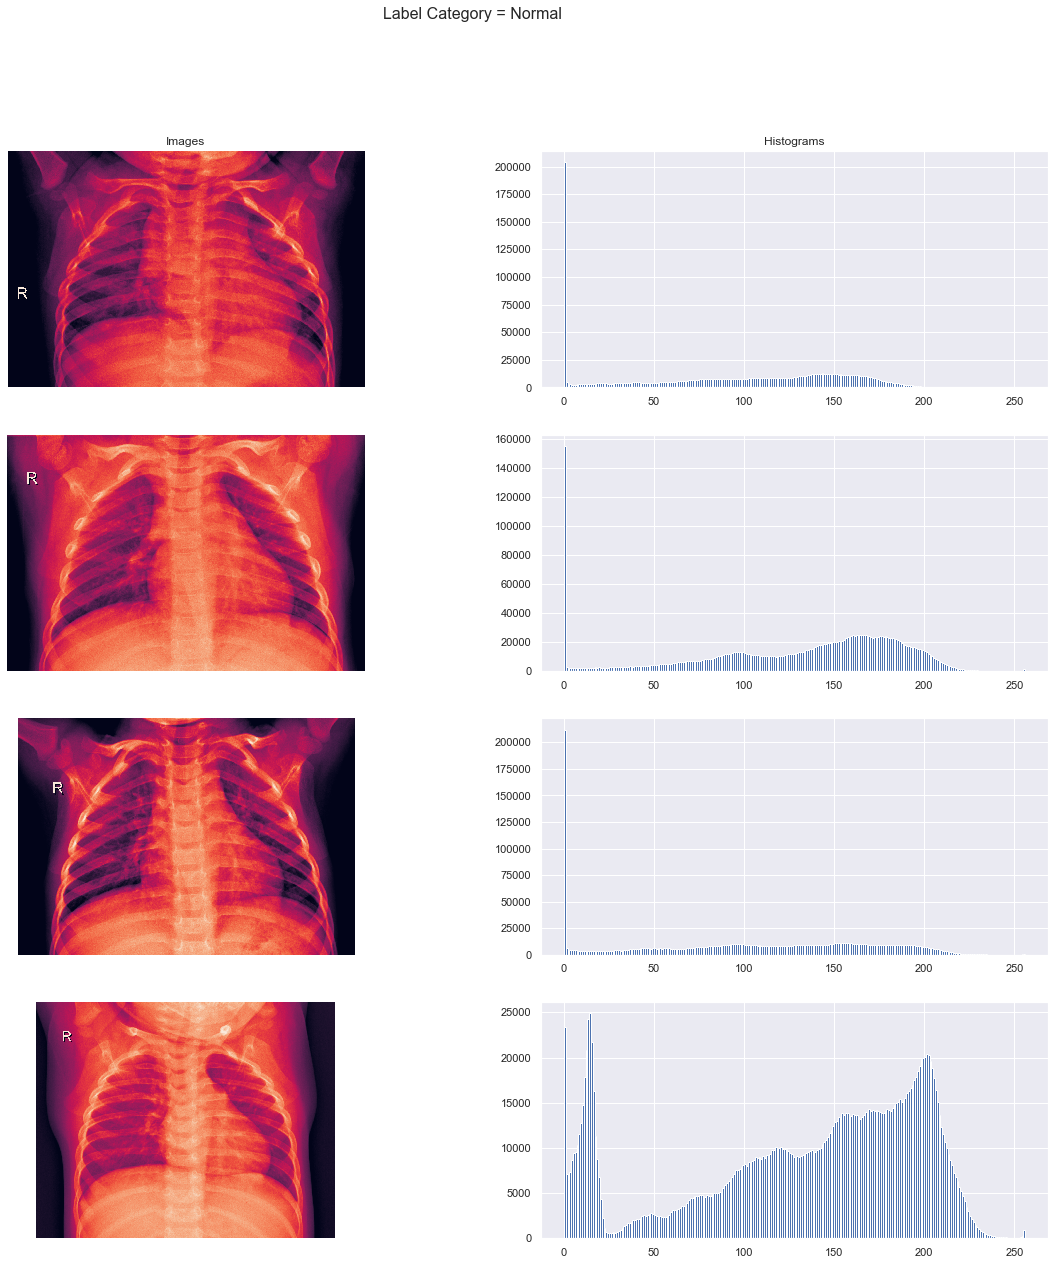

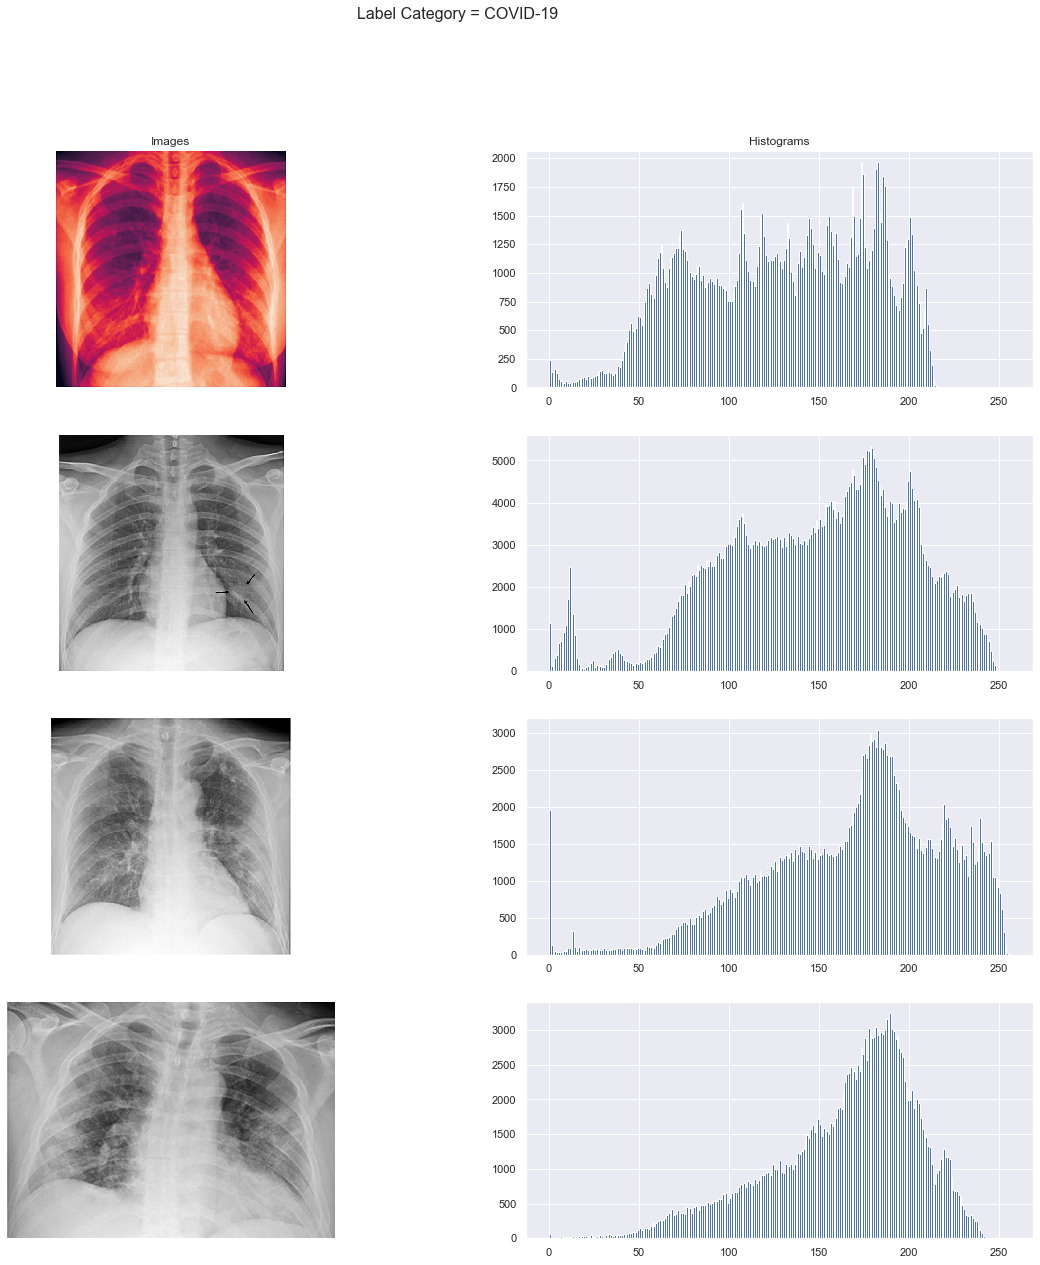

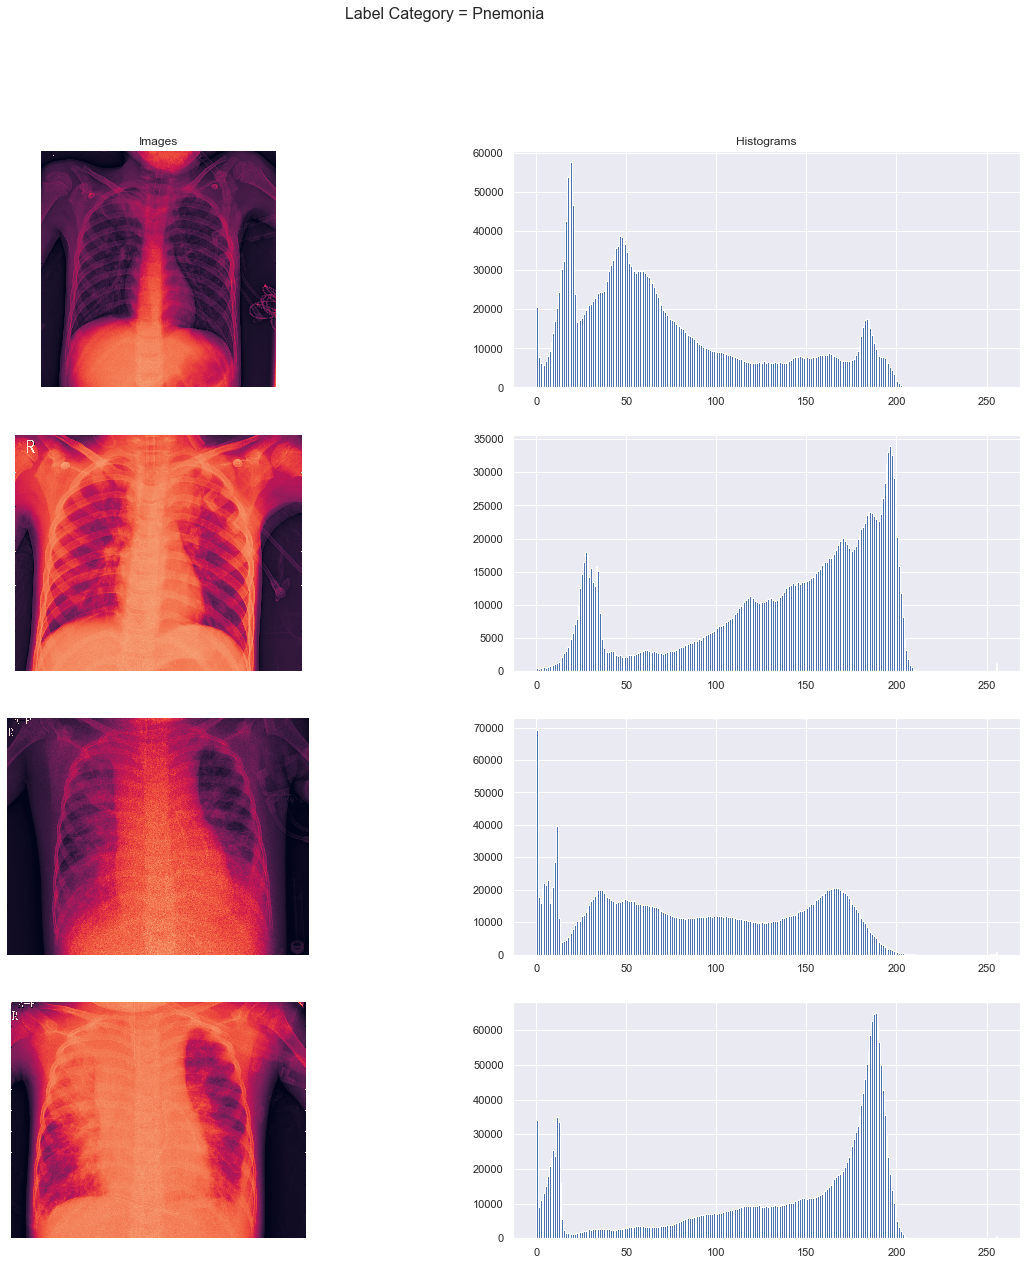

In [160]:
for col in list(set(train_label['Label'])):
    plot_image_histograms(col)

# Create train data and test data 

In [663]:
data_path=[TEST_FOLDER,TRAIN_FOLDER]  

In [384]:
import os
TRAIN_IMGS = os.listdir(TRAIN_FOLDER)
TEST_IMGS = os.listdir(TEST_FOLDER)
len(TRAIN_IMGS),len(TEST_IMGS)
# there are 5309 images in train folder and 624 images in test folder

(5275, 635)

In [191]:
# let's see what images are missing? 
# because some of images names in the meta data do not match the images in the train folder
missing_img=[]
for img in TRAIN_IMGS:
    if img not in list(train_label['X_ray_image_name']):
        missing_img.append(img)

In [167]:
# remove missing images from the train folder if the images name is not in the metadata
def remove_img(path, img_name):
    os.remove(path + '/' + img_name)
# check if file exists or not
    if os.path.exists(path + '/' + img_name) is False:
        # file did not exists
        return True

In [170]:
#remove images using the function    
path='/Users/user/Desktop/COVID-CT/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
for name in missing_img:
    remove_img(path, name)

In [385]:
## match the image names and the images so that we can get correct order with our target and exclude['.DS_Store']
train=pd.DataFrame()
train['X_ray_image_name']=TRAIN_IMGS


test=pd.DataFrame()
test['X_ray_image_name']=TEST_IMGS

In [391]:
TRAIN_IMGS[:10]

['person63_bacteria_306.jpeg',
 'person1438_bacteria_3721.jpeg',
 'person755_bacteria_2659.jpeg',
 'person478_virus_975.jpeg',
 'NORMAL2-IM-1301-0001.jpeg',
 'person661_bacteria_2553.jpeg',
 'person276_bacteria_1296.jpeg',
 'person1214_bacteria_3166.jpeg',
 'person1353_virus_2333.jpeg',
 'person26_bacteria_122.jpeg']

In [392]:
con_train.head(10)

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,person63_bacteria_306.jpeg,Pnemonia,TRAIN,unknown,bacteria
1,person1438_bacteria_3721.jpeg,Pnemonia,TRAIN,unknown,bacteria
2,person755_bacteria_2659.jpeg,Pnemonia,TRAIN,unknown,bacteria
3,person478_virus_975.jpeg,Pnemonia,TRAIN,unknown,Virus
4,NORMAL2-IM-1301-0001.jpeg,Normal,TRAIN,unknown,unknown
5,person661_bacteria_2553.jpeg,Pnemonia,TRAIN,unknown,bacteria
6,person276_bacteria_1296.jpeg,Pnemonia,TRAIN,unknown,bacteria
7,person1214_bacteria_3166.jpeg,Pnemonia,TRAIN,unknown,bacteria
8,person1353_virus_2333.jpeg,Pnemonia,TRAIN,unknown,Virus
9,person26_bacteria_122.jpeg,Pnemonia,TRAIN,unknown,bacteria


In [393]:
# merge dataframs
con_train=pd.merge(train,train_label,on='X_ray_image_name')
con_test=pd.merge(test,test_label,on='X_ray_image_name')

In [395]:
list(con_train.X_ray_image_name)==list(train.X_ray_image_name) # make sure the images order are same 

True

In [196]:
len(list(con_train.X_ray_image_name)),len(list(train.X_ray_image_name))

(5275, 5275)

In [622]:
y_train=con_train.Label.map({'COVID-19':0, 'Normal':1, 'Pnemonia':2})
y_test =con_test.Label.map({'COVID-19':0, 'Normal':1, 'Pnemonia':2})

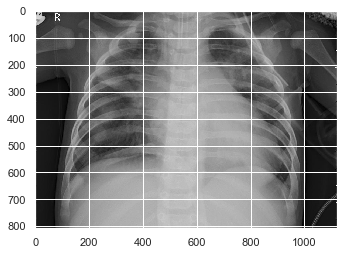

In [208]:
# Now let's see the if gray color is better , because there are different color of CT images (red or black/white)
for path in data_path:
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

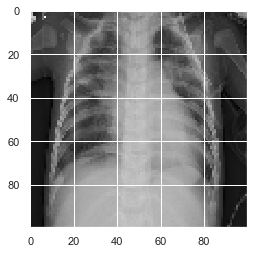

In [210]:
# try different size to see which size is proper 
size=100
new_array=cv2.resize(img_array,(size,size))
plt.imshow(new_array,cmap='gray')
plt.show()

# Declare X_train , X_test,Y_test and Y_train

In [211]:
def create_data(path):
    list_new_array=[]
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            size=100
            new_array=cv2.resize(img_array,(size,size))
            list_new_array.append(new_array)
        except Exception as e:
            pass
    return list_new_array    

In [212]:
#generate test_data
test_data=create_data(TEST_FOLDER)
train_data=create_data(TRAIN_FOLDER)

In [342]:
np.array(train_data).shape,np.array(test_data).shape

((5275, 100, 100), (635, 100, 100))

In [ ]:
#reshape the data 

In [610]:
x_train = np.array(train_data).reshape(5275, 100*100).astype('float32')
x_test = np.array(test_data).reshape(635, 100*100).astype('float32')

In [618]:
x_train

array([[206., 203., 205., ...,  41.,  46.,  48.],
       [  1.,  19.,  28., ...,   0.,   0.,   0.],
       [ 45.,  44.,  43., ...,  48.,  51.,  56.],
       ...,
       [ 39.,  40.,  40., ...,  30.,  30.,  27.],
       [ 42.,  50.,  54., ...,   0.,   0.,   0.],
       [ 76.,  83.,  89., ...,   8.,   0.,   0.]], dtype=float32)

In [623]:
len(y_train)

5275

# Oversampling

In [624]:
from sklearn.utils import resample
# concatenate our training data back together
training  = pd.DataFrame(x_train)
training['target']=y_train
training.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,206.0,203.0,205.0,207.0,133.0,64.0,179.0,43.0,46.0,39.0,...,11.0,12.0,11.0,17.0,30.0,36.0,41.0,46.0,48.0,2
1,1.0,19.0,28.0,45.0,53.0,58.0,63.0,63.0,62.0,56.0,...,71.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,45.0,44.0,43.0,41.0,40.0,38.0,38.0,36.0,35.0,33.0,...,124.0,86.0,37.0,45.0,48.0,46.0,48.0,51.0,56.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,19.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,233.0,143.0,95.0,76.0,79.0,166.0,129.0,114.0,121.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [625]:
# separate minority and majority classes 'COVID-19':0, 'Normal':1, 'Pnemonia':2
COVID= training[training.target==0]
Normal= training[training.target==1]
Pnemonia= training[training.target==2]

In [626]:
# Get a class count to understand the class imbalance.
print('COVID 19 count: '+ str(len(COVID)))
print('Normal count: '+ str(len(Normal)))
print('pneumonia count: '+ str(len(Pnemonia)))

COVID 19 count: 47
Normal count: 1342
Pnemonia count: 3886


In [627]:
# Oversample Normal type
Normal_upsampled = resample(Normal,
                          replace=True, # sample with replacement
                          n_samples=len(Pnemonia), # match number in majority class
                          random_state=23) # reproducible results
Normal_upsampled.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
2323,128.0,125.0,132.0,221.0,82.0,80.0,79.0,75.0,75.0,82.0,...,101.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2907,42.0,85.0,109.0,84.0,76.0,78.0,69.0,78.0,84.0,82.0,...,98.0,90.0,69.0,18.0,0.0,0.0,0.0,0.0,0.0,1
4179,38.0,44.0,42.0,97.0,68.0,72.0,72.0,83.0,112.0,55.0,...,151.0,126.0,59.0,27.0,14.0,0.0,0.0,0.0,0.0,1
3698,68.0,81.0,88.0,89.0,94.0,85.0,151.0,122.0,118.0,127.0,...,142.0,99.0,49.0,26.0,0.0,0.0,0.0,0.0,0.0,1
107,108.0,126.0,120.0,120.0,120.0,116.0,117.0,108.0,100.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [628]:
# Oversample Normal type
COVID_upsampled = resample(COVID,
                          replace=True, # sample with replacement
                          n_samples=len(Pnemonia), # match number in majority class
                          random_state=23) # reproducible results
COVID_upsampled.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
1544,92.0,67.0,70.0,72.0,95.0,90.0,97.0,91.0,90.0,83.0,...,120.0,127.0,120.0,143.0,151.0,163.0,154.0,144.0,128.0,0
4576,53.0,53.0,53.0,73.0,74.0,82.0,71.0,73.0,79.0,83.0,...,121.0,112.0,112.0,114.0,107.0,102.0,93.0,86.0,81.0,0
4804,12.0,8.0,4.0,7.0,7.0,5.0,0.0,2.0,2.0,3.0,...,0.0,0.0,3.0,1.0,7.0,9.0,9.0,14.0,13.0,0
823,2.0,3.0,3.0,4.0,11.0,18.0,26.0,32.0,37.0,38.0,...,187.0,186.0,186.0,189.0,196.0,193.0,186.0,183.0,172.0,0
4804,12.0,8.0,4.0,7.0,7.0,5.0,0.0,2.0,2.0,3.0,...,0.0,0.0,3.0,1.0,7.0,9.0,9.0,14.0,13.0,0


In [629]:
# combine those datasets
upsampled= pd.concat([COVID_upsampled, Normal_upsampled,Pnemonia])
upsampled.target.value_counts()

2    3886
1    3886
0    3886
Name: target, dtype: int64

In [634]:
# x_train and y_train
y_train = upsampled.target
x_train = np.array(upsampled.drop('target', axis=1))

In [636]:
len(y_train ),len(x_train)

(11658, 11658)

# Normalizing Image Data

In [637]:
X_train = x_train/255.
X_test = x_test/255.

In [638]:
#check the shape of our training and test data again to see if it worked.
X_train.shape ,X_test.shape 

((11658, 10000), (635, 10000))

In [639]:
#Use the function to_categorical() to one-hot encode our labels.
#This function can be found in the keras.utils sub-module. Pass in the following parameters:
# The object I want to one-hot encode, which will be Y_train and Y_test
# The number of classes contained in the labels, 3
Y_train = tf.keras.utils.to_categorical(y_train, 3)
Y_test = tf.keras.utils.to_categorical(y_test, 3)
Y_test[0]

array([0., 0., 1.], dtype=float32)

In [640]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape # Check the shape again

((11658, 10000), (11658, 3), (635, 10000), (635, 3))

# Pickle

In [761]:
import pickle
import numpy as np
datasets=[X_train,Y_train,X_test,Y_test]
dataset_names=['X_train','Y_train','X_test','Y_test']
for i in range(len(dataset_names)):
    pickle_out=open(dataset_names[i], 'wb')
    pickle.dump(datasets[i], pickle_out)
    pickle_out.close()

In [762]:
Y_train= pickle.load(open('Y_train',"rb"))
Y_test= pickle.load(open('Y_test',"rb"))
X_train=pickle.load(open('X_train',"rb"))
X_test=pickle.load(open('X_test',"rb"))

# Modeling 

## Neural NetWork model1

In [699]:
import random
from keras import regularizers

In [742]:
random.seed(123)
model_1 = Sequential()

model_1.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.005),input_shape=(10000,)))

model_1.add(Dense(32,kernel_regularizer=regularizers.l2(0.005),activation='tanh'))


model_1.add(Dropout(0.3))           


model_1.add(Dense(3, activation='softmax'))


model_1.summary()
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 64)                640064    
_________________________________________________________________
dense_158 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 3)                 99        
Total params: 642,243
Trainable params: 642,243
Non-trainable params: 0
_________________________________________________________________


In [763]:
results_1 = model_1.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test))


In [751]:
# function to see the loss and accuracy 
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [752]:
# function to get the accuracy
def nn_result_prediction(X_train, y_train,X_test, y_test,model):
    # obtian Accuracies for train data and test data
    loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy1))
    loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy2))
    #prediction
    nn_train_pre=model.predict_classes(X_train)
    nn_test_pre=model.predict_classes(X_test)
    return nn_train_pre,nn_test_pre

In [753]:
# function for confusion_matrix plot
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

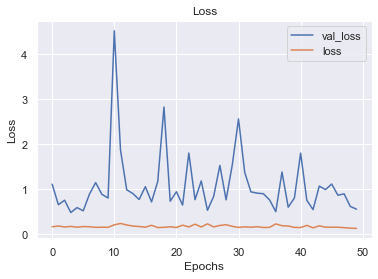

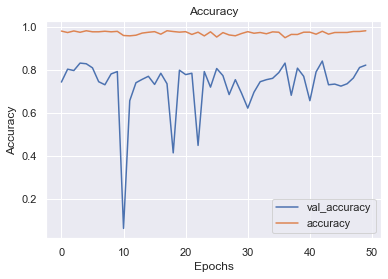

In [754]:
visualize_training_results(results_1)

In [755]:
# Accuracy
nn_train_pre,nn_test_pre=nn_result_prediction(X_train, Y_train,X_test, Y_test,model_1)

Training Accuracy: 0.9702
Testing Accuracy:  0.8220


In [760]:
nn_predict_test = model_1.predict(X_test).round() # get the predition
nn_predict_train = model_1.predict(X_train).round()
# obtian train data f1_Score
print('Train data f1_Score:{}'.format(f1_score(Y_train,nn_predict_train,average='weighted')))
# Obtain Test data f1_Score
print('Test data f1_Score:{}'.format(f1_score(Y_test, nn_predict_test,average='weighted')))

Train data f1_Score:0.9700983936657357
Test data f1_Score:0.8220129764851088


Confusion Matrix, without normalization
[[  7   3   1]
 [ 16 153  65]
 [  0  27 363]]


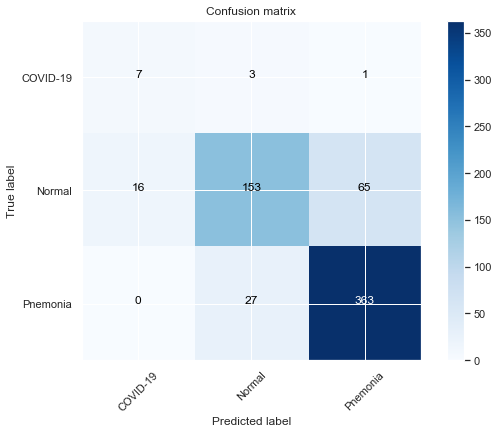

In [756]:

# confusion matrxi
cm = confusion_matrix(Y_test.argmax(axis=1), roundpredict.argmax(axis=1))
classes = ['COVID-19', 'Normal', 'Pnemonia'] # class names
# recall the plot function
plt.figure(figsize=(8,6))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Random Forest 

In [518]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [541]:

# given prameters different values
random_grid={
            'n_estimators':list(range(400,500,10))
            'max_depth':list(range(1,30,2))
               
             }
# random forest model,
rf=RandomForestClassifier(n_jobs=-1,random_state=0)

In [542]:
RS=RandomizedSearchCV(rf,random_grid,cv=5,verbose=2,scoring="f1_weighted")

In [757]:
# fit the train data
RS.fit(X_train,Y_train)

In [544]:
# obtian best parameters best score
RS.best_score_,RS.best_params_

(0.946412645988495, {'max_depth': 29})

In [545]:
#using the best parameters 
rfc=RandomForestClassifier(n_estimators=430,
                            max_depth=29, 
                           n_jobs=-1, 
                           random_state=0)

In [546]:
rfc.fit(X_train,Y_train) # fit the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=29, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=430,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [719]:
# Score for train and test data 
print("Accuracy of train data :" ,rfc.score(X_train,Y_train))
print("Accuracy of test data :" ,rfc.score(X_test,Y_test))

Score of train data : 0.9929662034654315
Score of test data : 0.7354330708661417


In [728]:
# obtian train data f1_Score
pre_train=rfc.predict(X_train)
print('Train data f1_Score:{}'.format(f1_score(Y_train, pre_train,average='weighted')))
# Obtain Test data f1_Score
y_pred=rfc.predict(X_test)
print('Test data f1_Score:{}'.format(f1_score(Y_test, y_pred,average='weighted')))

Train data f1_Score:0.9929672146245515
Test data f1_Score:0.7021173932421696


Confusion Matrix, without normalization
[[  2   1   8]
 [ 19  80 135]
 [  0   3 387]]


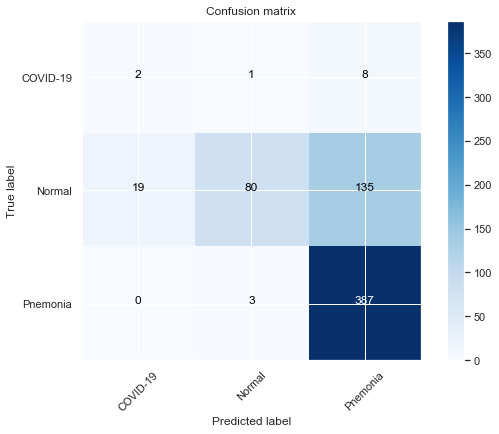

In [734]:
rf_cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(8,6))
plot_confusion_matrix(rf_cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)